### General information about the dataset
- FAVC: Frequent consumption of high caloric food
- FCVC: Frequency of consumption of vegetables
- NCP: Number of main meals
- CAEC: Consumption of food between meals
- CH2O: Consumption of water daily
- CALC: Consumption of alcohol (CALC) 
- SCC: Calories consumption monitoring 
- FAF: Physical activity frequency
- TUE: Time using technology devices
- MTRANS: Transportation used
- All data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

outcome:
obesity level prediction (by giving information of a person can predict obesity type)
feature importance analysis(analyze the importance of different features in predicting obesity) 
find out some live patterns which can cause obesity

labeled data
supervised machine learning
classification(multiclass)
models: logistic regression, decision trees, SVC

K-means clustering (to find inherent patterns in the dataset, also to compare the clusters obtained from clustering with the actual class labels)
cross validation
hyperparameter tuning

used for creating dummy variables
female = 1
male = 0
yes = 1
no = 0

### Import libraries

In [49]:
# Data processing and analysis
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Classification metrices
from sklearn.metrics import accuracy_score, confusion_matrix

### Import dataset

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Data Exploration and Visualization
- rename the column name
- explore the dataset: shape, statistical properties, missing value, datatype, correlation, numerical values, categorical values
- visualise frequency distribution about obesity levels (consider of gender, family history)
- relationship between independent values and dependent value

In [3]:
# Rename column name
column_name_mapping = {'NObeyesdad': 'NObesity'}
df.rename(columns=column_name_mapping, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# View dimensions of dataset
df.shape

(2111, 17)

In [111]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObesity'],
      dtype='object')

In [30]:
# check missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64

In [12]:
# check statistical properties of data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,2111,2,Male,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2111.0,NaN,NaN,NaN,24.3126,6.345968,14.0,19.947192,22.77789,26.0,61.0
Height,2111.0,NaN,NaN,NaN,1.701677,0.093305,1.45,1.63,1.700499,1.768464,1.98
Weight,2111.0,NaN,NaN,NaN,86.586058,26.191172,39.0,65.473343,83.0,107.430682,173.0
family_history_with_overweight,2111,2,yes,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,2111,2,yes,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,2111.0,NaN,NaN,NaN,2.419043,0.533927,1.0,2.0,2.385502,3.0,3.0
NCP,2111.0,NaN,NaN,NaN,2.685628,0.778039,1.0,2.658738,3.0,3.0,4.0
CAEC,2111,4,Sometimes,1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKE,2111,2,no,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# find out numerical values
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head() # all continous variables

Number of numerical variables:  8


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


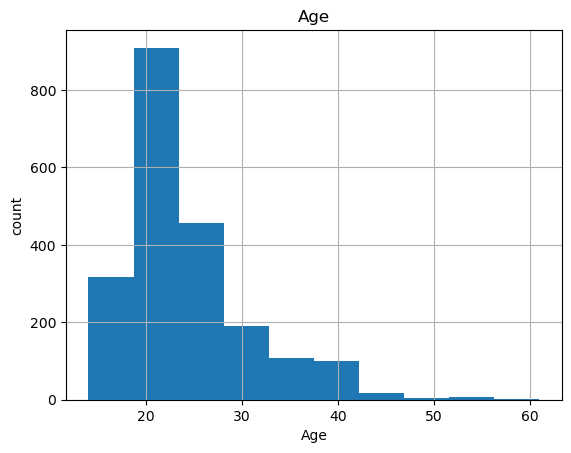

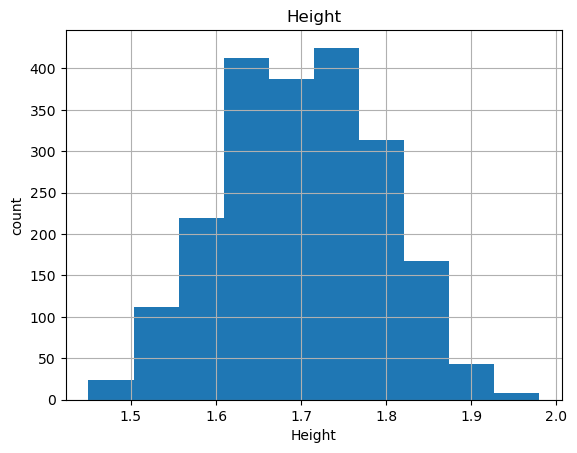

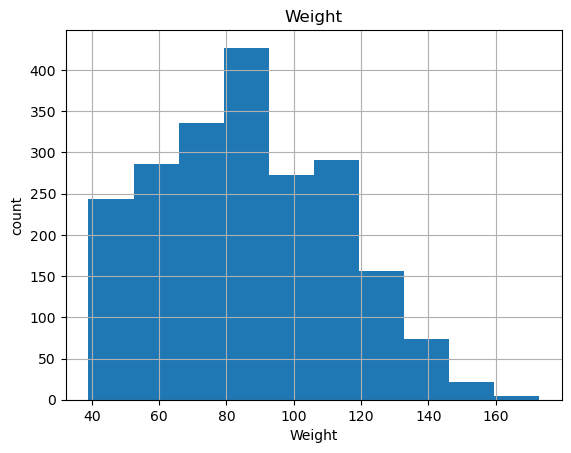

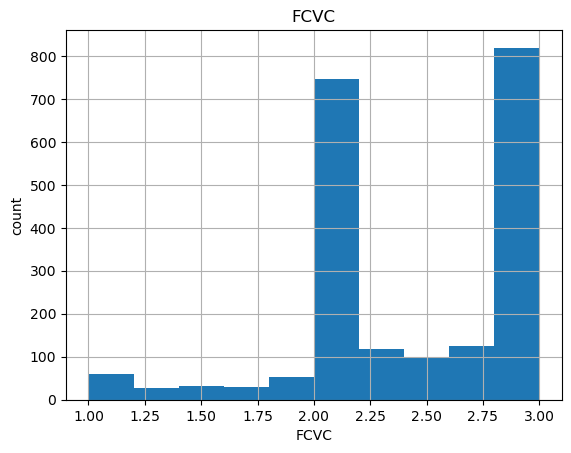

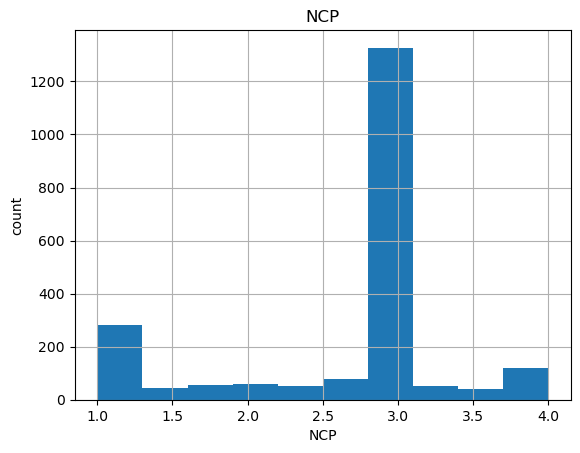

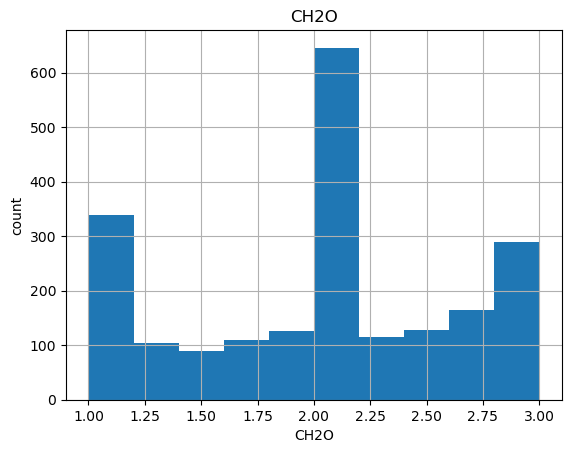

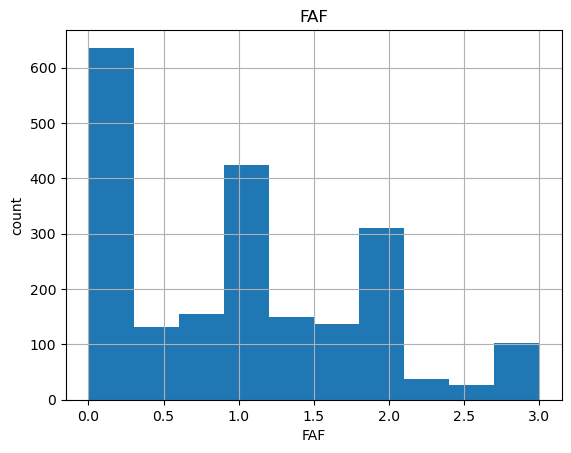

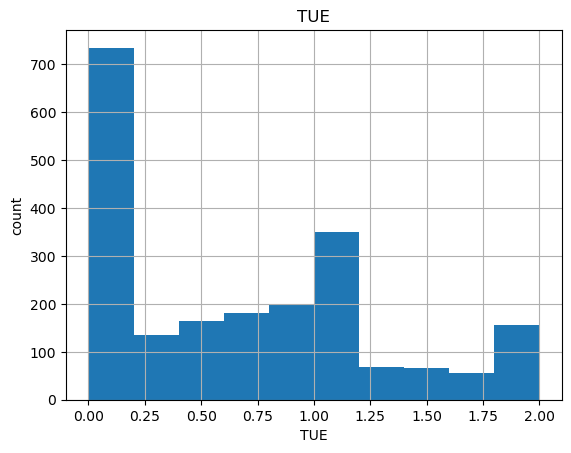

In [41]:
# visualize the distribution of each numerical variables
for feature in numerical_features:
    data = df.copy()
    data[feature].hist(bins = 10)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [4]:
# find out categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical variables: ', len(categorical_features))

df[categorical_features].head()

Number of categorical variables:  9


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [44]:
# count unique value for each category
for feature in categorical_features:
    print('The feature is {} and the number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is Gender and the number of categories are 2
The feature is family_history_with_overweight and the number of categories are 2
The feature is FAVC and the number of categories are 2
The feature is CAEC and the number of categories are 4
The feature is SMOKE and the number of categories are 2
The feature is SCC and the number of categories are 2
The feature is CALC and the number of categories are 4
The feature is MTRANS and the number of categories are 5
The feature is NObeyesdad and the number of categories are 7


In [12]:
df['NObesity'].unique() # 7 unique values

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
# frequency distribution
df['NObesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObesity, dtype: int64

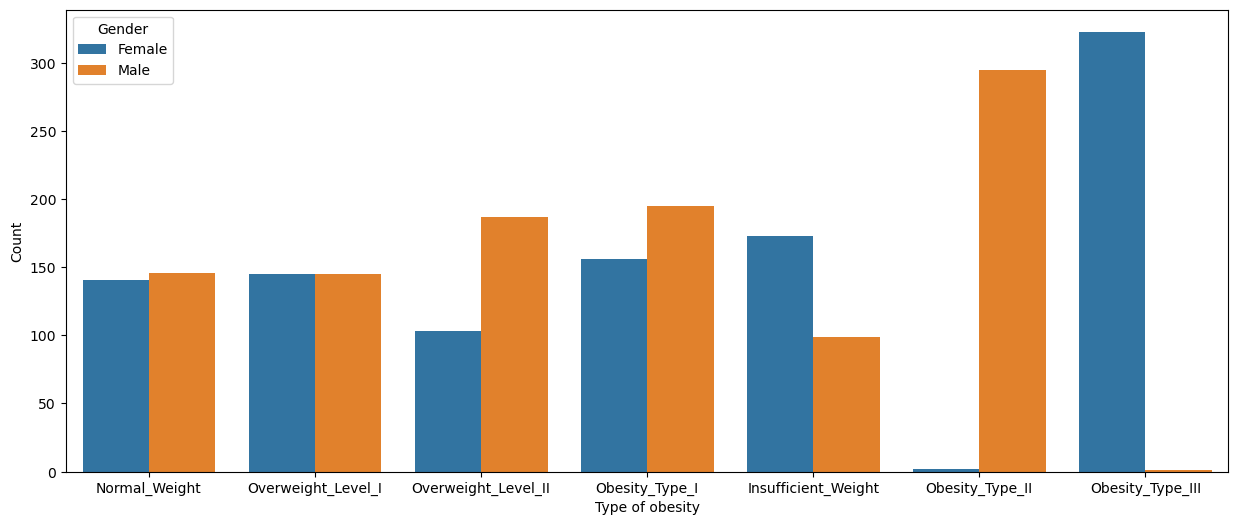

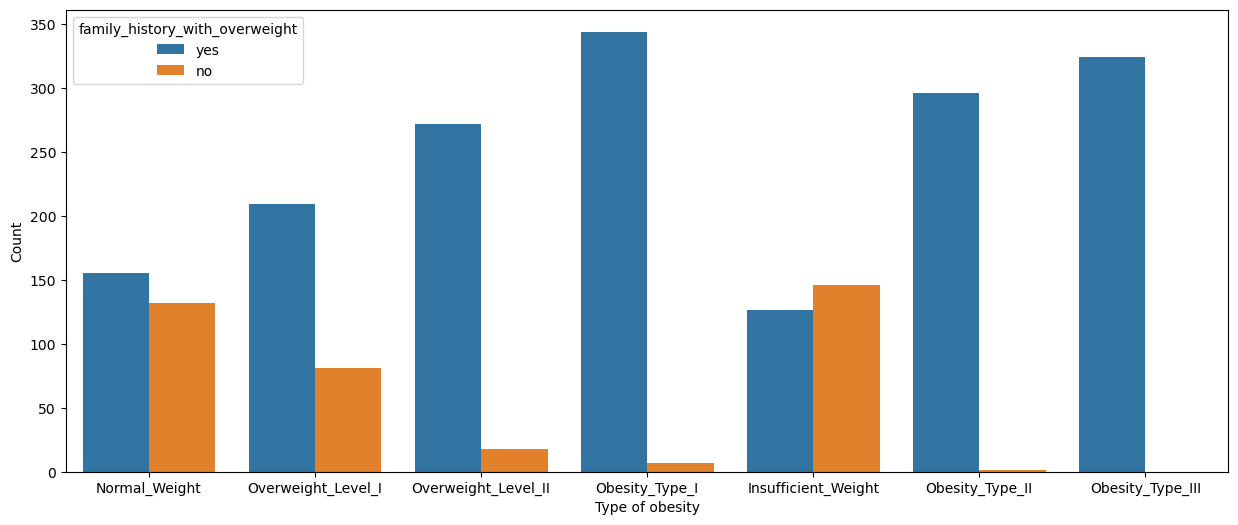

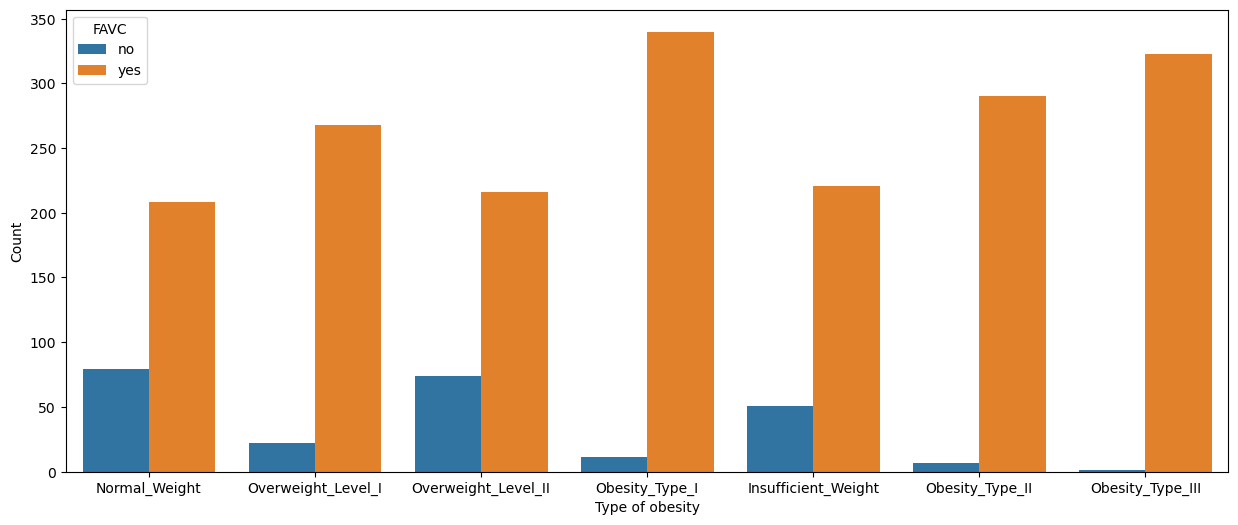

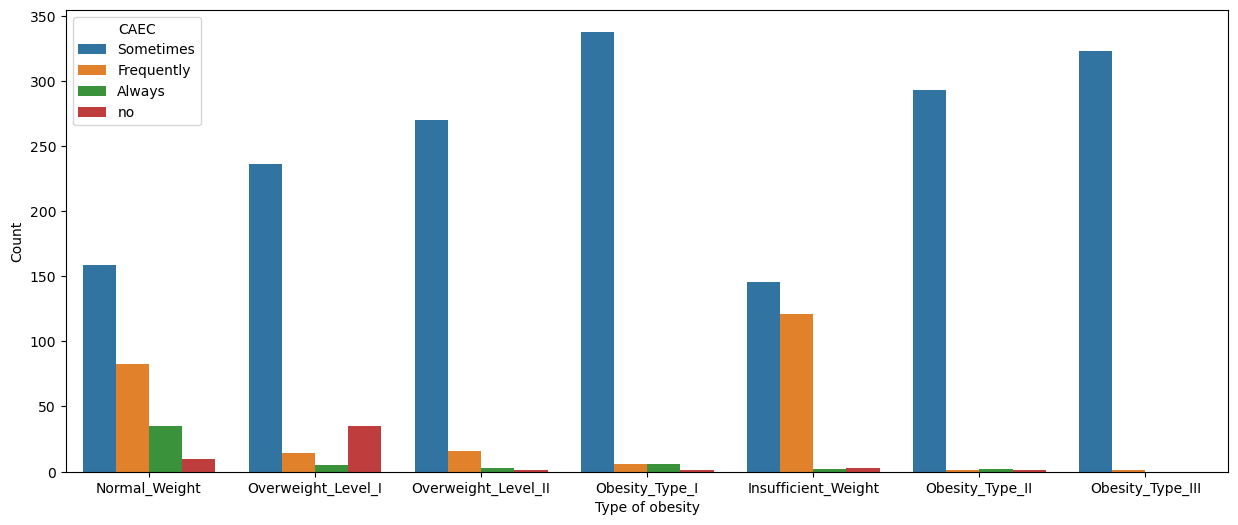

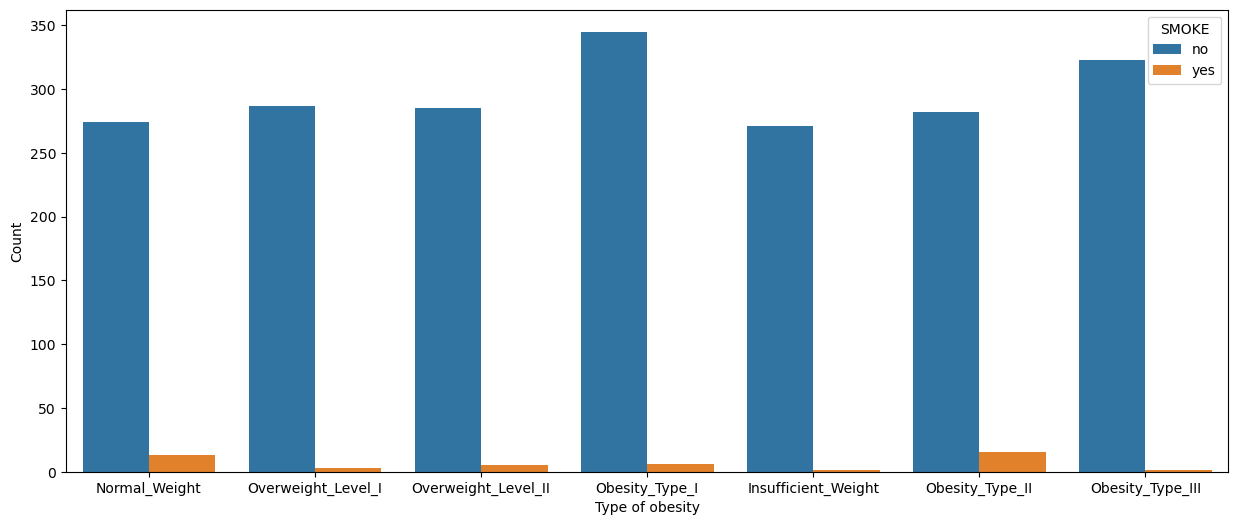

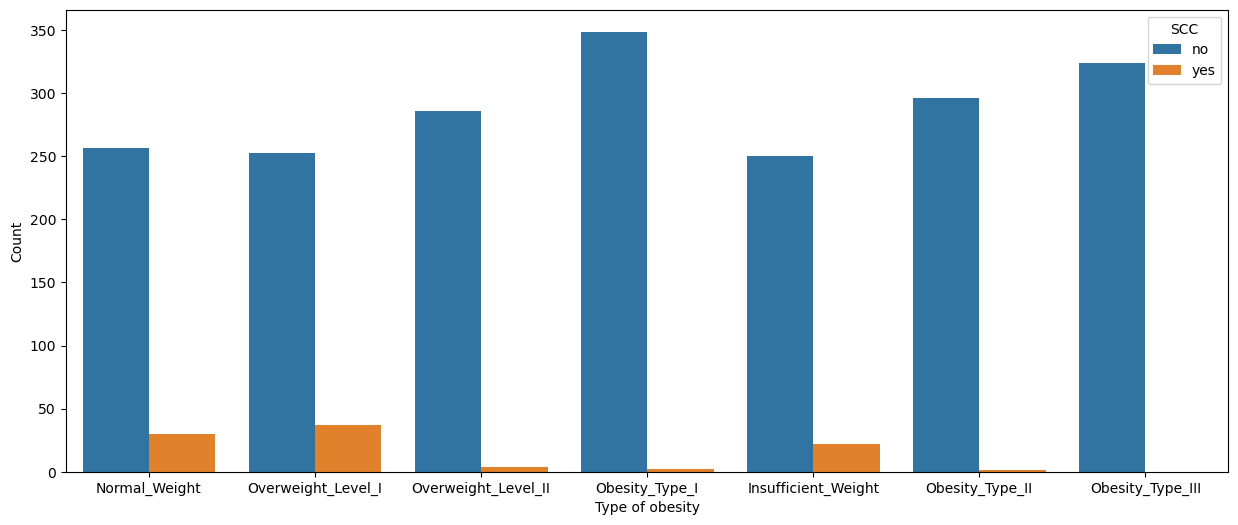

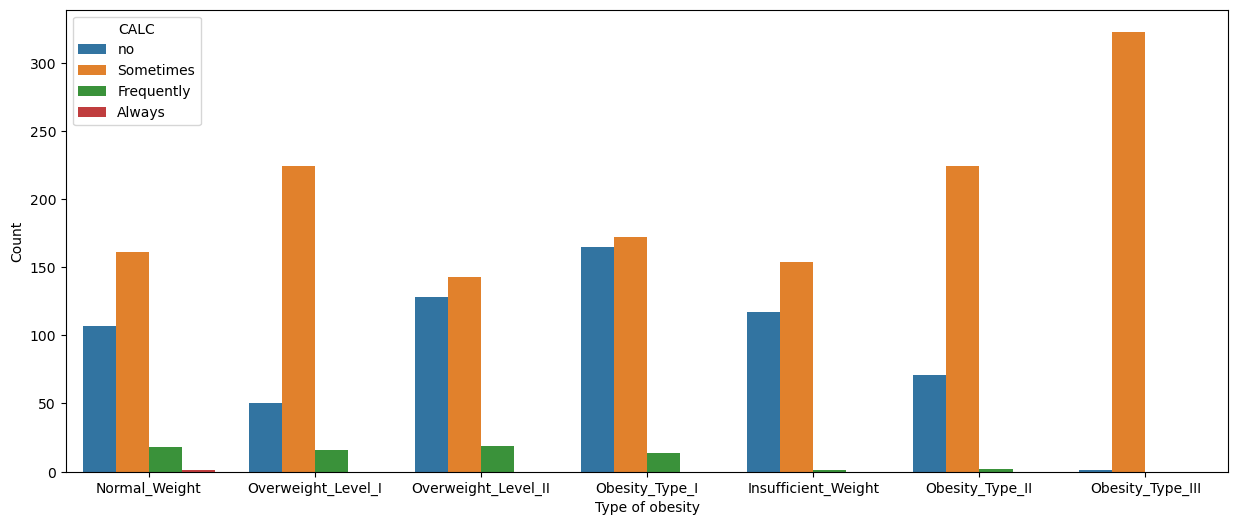

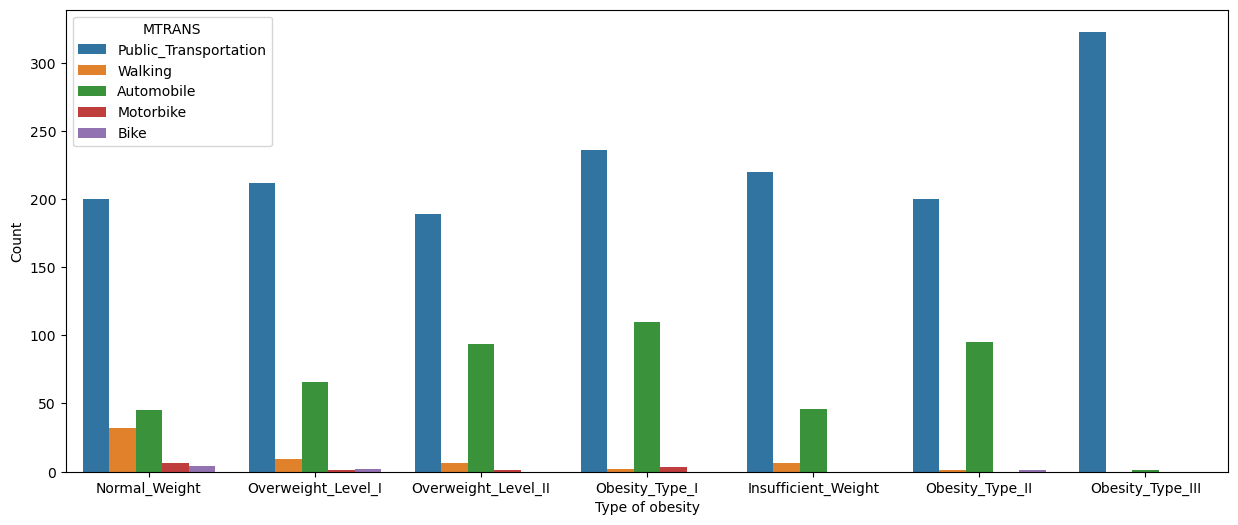

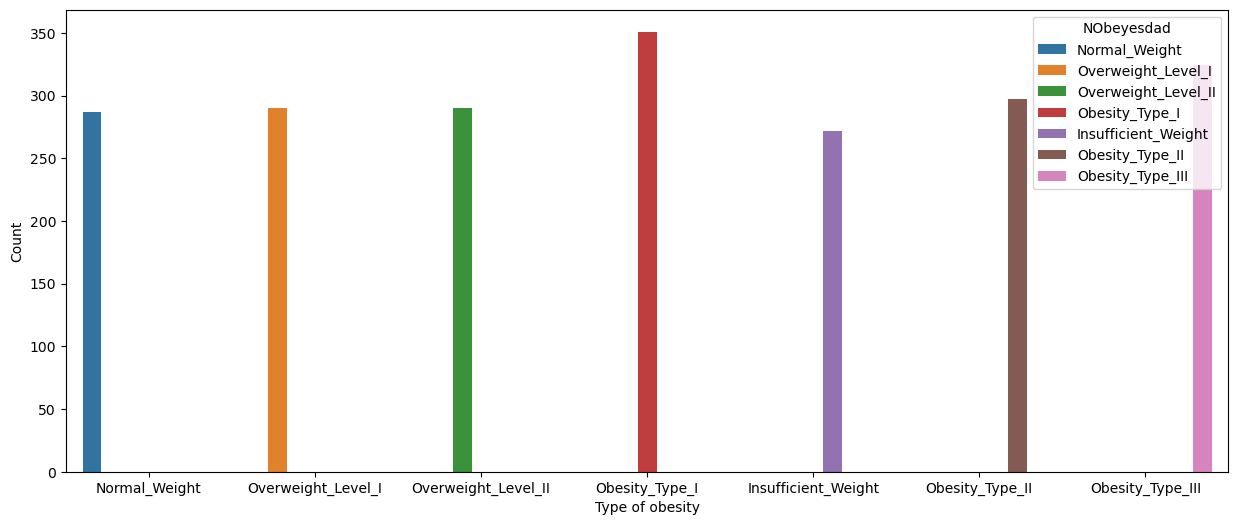

In [49]:
# plot each category based on obesity level
for feature in categorical_features:
    data = df.copy()
    f, ax = plt.subplots(figsize=(15, 6))
    sns.countplot(ax = ax, x='NObeyesdad', data=df, hue = feature)
    plt.xlabel('Type of obesity')
    plt.ylabel('Count')
    plt.show()

In [27]:
# find out more information
no_history_yes_obese = df[(df['family_history_with_overweight'] == 'no') &
                        (df['NObesity'].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']))]

yes_history_no_obese = df[(df['family_history_with_overweight'] == 'yes') &
                         df['NObesity'].isin(['Insufficient_Weight', 'Normal_Weight'])]

print("Persons with no family history but are obese:")
print(len(no_history_yes_obese))
print(len(no_history_yes_obese) / len(df))

print("Persons with family history but are not obese:")
print(len(yes_history_no_obese))
print(len(yes_history_no_obese) / len(df))

Persons with no family history but are obese:
107
0.050686878256750355

Persons with family history but are not obese:
281
0.133112269066793


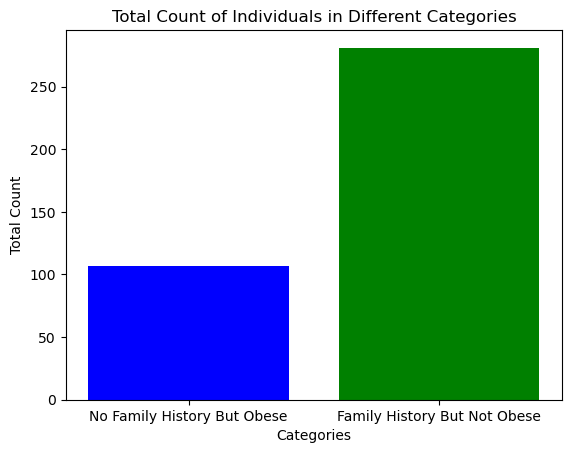

In [28]:
total_no_history_obese = len(no_history_yes_obese)
total_history_not_obese = len(yes_history_no_obese)
categories = ['No Family History But Obese', 'Family History But Not Obese']
totals = [total_no_history_obese, total_history_not_obese]

# Create a bar chart
plt.bar(categories, totals, color=['blue', 'green'])
plt.xlabel('Categories')
plt.ylabel('Total Count')
plt.title('Total Count of Individuals in Different Categories')
plt.show()

In [4]:
# Create a correlation matrix
# Avoid using variables that have strong correlations with each other
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

C:\Users\karen\AppData\Local\Temp\ipykernel_10624\1296023913.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_metrics = df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


Findings: 
- 2111 rows, 17 columns
- no missing values
- contains 9 categorical variables and 8 numerical variables
- no strong correlation relationship between variables

### Feature scaling

In [5]:
df_new = df.copy()
df_new['Gender'] = df_new['Gender'].map({'Female': 1, 'Male': 0})
df_new['family_history_with_overweight'] = df_new['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df_new['FAVC'] = df_new['FAVC'].map({'yes': 1, 'no': 0})
df_new['SMOKE'] = df_new['SMOKE'].map({'yes': 1, 'no': 0})
df_new['SCC'] = df_new['SCC'].map({'yes': 1, 'no': 0})
df_new

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
dummy_columns = ['CAEC', 'CALC','MTRANS']
dummy_data = pd.get_dummies(df_new[dummy_columns], columns=dummy_columns, prefix=dummy_columns)

# Drop the original categorical columns
data = df_new.drop(dummy_columns, axis=1)

# Concatenate the dummy variables and the original dataset
data_dummies = pd.concat([data, dummy_data], axis=1)

print(data_dummies)
print(data_dummies.columns)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2          0  23.000000  1.800000   77.000000                               1   
3          0  27.000000  1.800000   87.000000                               0   
4          0  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  133.346641                               1   
2110       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  SMOK

In [9]:
numerical_vars = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
dummy_vars = ['Gender', 'family_history_with_overweight', 'FAVC','SMOKE','SCC','CAEC_Always','CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no','CALC_Always', 'CALC_Frequently','CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile','MTRANS_Bike', 'MTRANS_Motorbike','MTRANS_Public_Transportation', 'MTRANS_Walking']
target_var = ['NObesity']

# Standardize continuous variables
scaler = StandardScaler()
data_dummies[numerical_vars] = scaler.fit_transform(data_dummies[numerical_vars])

# Concatenate standardized continuous variables and dummy variables
preprocessed_data = pd.concat([data_dummies[numerical_vars], data_dummies[dummy_vars], data_dummies[target_var]], axis=1)

print(preprocessed_data)
print(preprocessed_data.columns)

           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1    -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2    -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3     0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4    -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.525774  0.097045  1.711763  1.088342  0.404153 -0.456705  0.783135   
2107 -0.367195  0.502844  1.800914  1.088342  0.404153 -0.004702  0.389341   
2108 -0.281909  0.541672  1.798868  1.088342  0.404153  0.075361  0.474971   
2109  0.007776  0.404927  1.785780  1.088342  0.404153  1.377801  0.151471   
2110 -0.102119  0.398344  1.790592  1.088342  0.404153  1.396035  0.018996   

           TUE  Gender  family_history_with_overweight  ...  CA

### Modelling
all features are selected

In [12]:
# Set features and target variable
X = preprocessed_data.drop(['NObesity'], axis = 1)
y = preprocessed_data['NObesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
names = ["Logistic Regression","Decision Trees","Random Forests","SVM","KNN"]

In [36]:
classifiers = [LogisticRegression(multi_class='multinomial'),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=10),
              SVC(kernel = "rbf", C=1),
              KNeighborsClassifier(n_neighbors = 5)]

In [37]:
accuracy_scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

C:\Users\karen\Tool\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  :  0.8676
Decision Trees  :  0.9433
Random Forests  :  0.9314
SVM  :  0.9338
KNN  :  0.8322


In [38]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.8676
1,Decision Trees,0.9433
2,Random Forests,0.9314
3,SVM,0.9338
4,KNN,0.8322


In [100]:
# cross validation
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))

Logistic Regression :0.8199
Decision Trees :0.7050
Random Forests :0.7950
SVM :0.8886
KNN :0.8122


### PCA

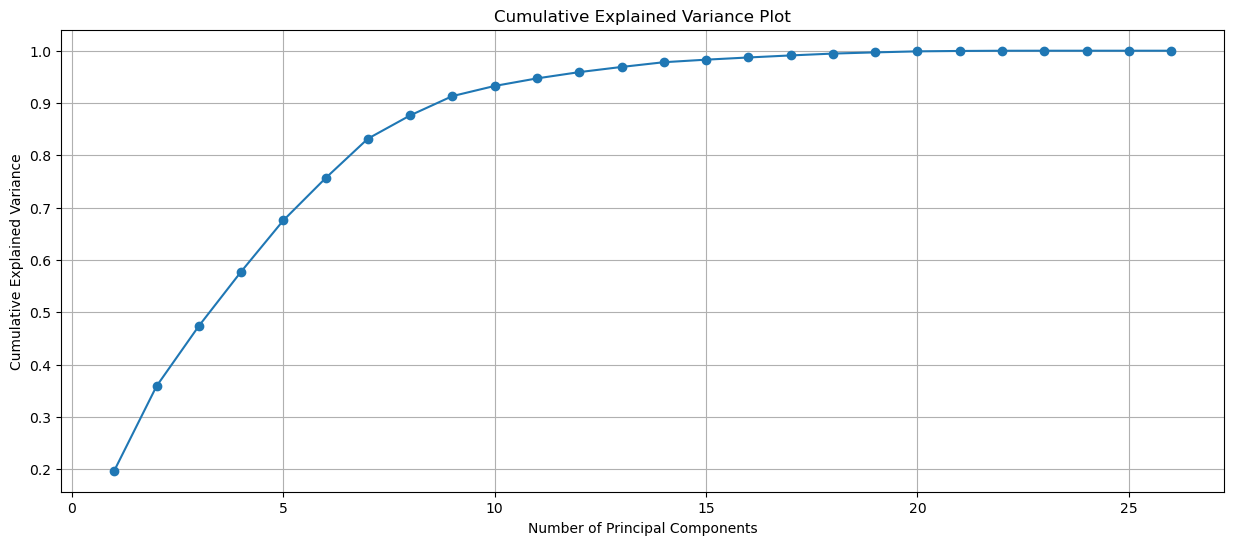

In [82]:
X = preprocessed_data.drop(['NObesity'], axis = 1)
pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [95]:
n_components = 11
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [96]:
names = ["Logistic Regression","Decision Trees","Random Forests","SVM","KNN"]

In [97]:
classifiers = [LogisticRegression(multi_class='multinomial'),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=10),
              SVC(kernel = "rbf", C=1),
              KNeighborsClassifier(n_neighbors = 5)]

In [98]:
accuracy_scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8463
Decision Trees  :  0.6525
Random Forests  :  0.8227
SVM  :  0.896
KNN  :  0.8203


### Support Vector Machines
- Accuracy score:
1. all features selected: 0.9338 (kernel = "rbf", C = 1)
2. hyperparameter tuning use GridSearchCV: 0.9787 (kernel = "linear", C = 10)

In [80]:
svm_classifier = SVC()

# Define hyperparameters and their values for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)  #5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.9787


In [99]:
# cross validation
best_params = {'C': 10, 'kernel': 'linear'}
best_model = SVC(**best_params)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print('Cross-Validation Mean Accuracy:', mean_cv_score)
print('Cross-Validation Accuracy Standard Deviation:', std_cv_score)

Cross-Validation Mean Accuracy: 0.870847892121574
Cross-Validation Accuracy Standard Deviation: 0.015101302786182139


### RandomForest
- Accuracy score:
1. all features selected: 0.9456
2. apply RFE: 0.9574 (5 features selected)
3. apply RFE with cross validation: 0.9622 (9 features selected)

Accuracy is:  0.9456264775413712


<Axes: >

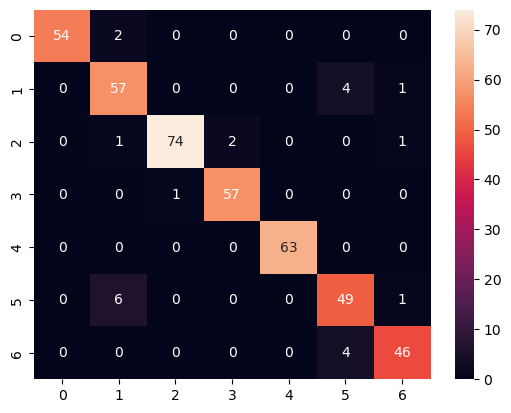

In [62]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [63]:
clf_rf_2 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
selected_feature_indices = rfe.support_
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP'], dtype='object')


In [71]:
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP']
x = preprocessed_data[features]
y = preprocessed_data['NObesity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9574468085106383


In [52]:
clf_rf_3 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 9
Best features : Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender'],
      dtype='object')


In [78]:
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','Gender']
x = preprocessed_data[features]
y = preprocessed_data['NObesity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9621749408983451


In [101]:
# cross validation
model = RandomForestClassifier()

# Perform cross-validation and calculate accuracy scores for each fold
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print('Cross-Validation Mean Accuracy:', mean_cv_score)
print('Cross-Validation Accuracy Standard Deviation:', std_cv_score)

Cross-Validation Mean Accuracy: 0.9517304740456904
Cross-Validation Accuracy Standard Deviation: 0.051743755178662976
